In [1]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [6]:
pos = np.array([[3, 7], [4, 6], [5, 6], [7, 7], [8, 5], [5, 5.2], [7, 5]])
neg = np.array([[4, 5], [5, 5], [6, 3], [7, 4], [9, 4]])

X = np.ones((pos.shape[0]+neg.shape[0], 2))
X[0:pos.shape[0], :] = pos
X[pos.shape[0]:pos.shape[0]+neg.shape[0], :] = neg

Y = np.ones(pos.shape[0] + neg.shape[0])
Y[0:pos.shape[0]] = 1
Y[pos.shape[0]:pos.shape[0]+neg.shape[0]] = -1

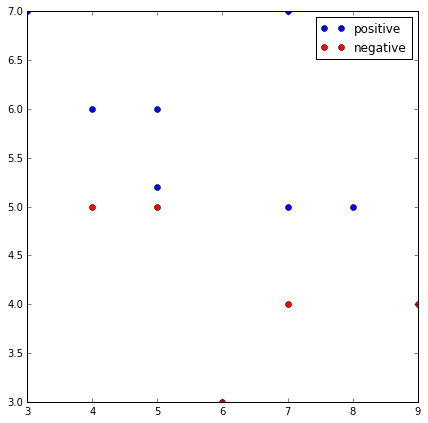

In [7]:
plt.figure(1, figsize = (7, 7))
plt.plot(X[0:pos.shape[0], 0], X[0:pos.shape[0], 1], 'bo', label = 'positive')
plt.plot(X[pos.shape[0]:pos.shape[0] + neg.shape[0], 0], X[pos.shape[0]:pos.shape[0] + neg.shape[0], 1], 'ro', label = 'negative')
plt.legend()
plt.show()

In [8]:
A = np.zeros((X.shape[0], X.shape[1] + 1))
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        A[i, j] = X[i, j]*Y[i]*(-1)
    A[i, -1] = Y[i]*(-1)
    
b = np.ones(X.shape[0]) * (-1)

H = np.zeros((X.shape[1] + 1, X.shape[1] + 1))
for i in range(X.shape[1]):
    H[i, i] = 1

f = np.zeros(X.shape[1]+1)

H = matrix(H)
f = matrix(f)
A = matrix(A)
b = matrix(b)

sol = solvers.qp(H, f, A, b)
w = sol['x']

     pcost       dcost       gap    pres   dres
 0:  2.1633e-01  1.3550e+01  3e+01  2e+00  3e+01
 1:  2.0769e+00  8.4069e+00  1e+01  9e-01  1e+01
 2:  7.7169e+00  4.8514e+01  2e+01  7e-01  1e+01
 3:  2.9306e+01  3.7433e+01  2e+01  4e-01  6e+00
 4:  4.4048e+01  4.4448e+01  1e+01  1e-01  2e+00
 5:  4.7968e+01  4.6289e+01  7e+00  5e-02  9e-01
 6:  5.0548e+01  5.0395e+01  2e-01  7e-04  1e-02
 7:  5.0501e+01  5.0499e+01  3e-03  7e-06  1e-04
 8:  5.0500e+01  5.0500e+01  3e-05  7e-08  1e-06
 9:  5.0500e+01  5.0500e+01  3e-07  7e-10  1e-08
Optimal solution found.


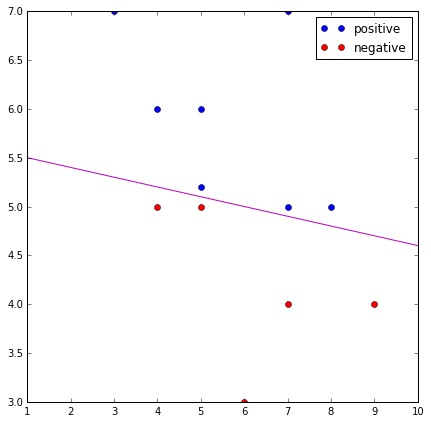

In [52]:
plt.figure(1, figsize = (7, 7))
plt.plot(X[0:pos.shape[0], 0], X[0:pos.shape[0], 1], 'bo', label = 'positive')
plt.plot(X[pos.shape[0]:pos.shape[0] + neg.shape[0], 0], X[pos.shape[0]:pos.shape[0] + neg.shape[0], 1], 'ro', label = 'negative')
plt.legend()

lineX = [1, 10]

lineY0 = [(w[2] + w[0]*lineX[0])/-w[1], (w[2] + w[0]*lineX[1])/-w[1]]
plt.plot(lineX, lineY0, 'm-')
plt.show()

1. C = 0.1

     pcost       dcost       gap    pres   dres
 0:  4.3480e-01  4.8114e+00  5e+01  2e+00  3e+01
 1:  2.1377e+00  5.0104e-02  2e+00  3e-02  4e-01
 2:  8.9205e-01  6.9300e-01  2e-01  2e-03  2e-02
 3:  8.1059e-01  7.7511e-01  4e-02  2e-04  3e-03
 4:  7.9130e-01  7.8923e-01  2e-03  5e-06  7e-05
 5:  7.9043e-01  7.9028e-01  2e-04  8e-08  1e-06
 6:  7.9040e-01  7.9040e-01  3e-06  6e-10  1e-08
 7:  7.9040e-01  7.9040e-01  3e-08  6e-12  9e-11
Optimal solution found.

2. C = 0.3

     pcost       dcost       gap    pres   dres
 0:  4.0427e-01  8.4292e+00  5e+01  2e+00  3e+01
 1:  5.3203e+00  1.4958e+00  4e+00  7e-16  1e-14
 2:  2.1676e+00  1.7493e+00  4e-01  6e-16  2e-15
 3:  1.9684e+00  1.9216e+00  5e-02  3e-16  7e-14
 4:  1.9429e+00  1.9348e+00  8e-03  5e-16  8e-14
 5:  1.9394e+00  1.9388e+00  6e-04  4e-16  6e-13
 6:  1.9392e+00  1.9392e+00  2e-05  5e-16  4e-12
 7:  1.9392e+00  1.9392e+00  3e-06  5e-16  4e-11
 8:  1.9392e+00  1.9392e+00  3e-07  4e-16  2e-10
Optimal solution found

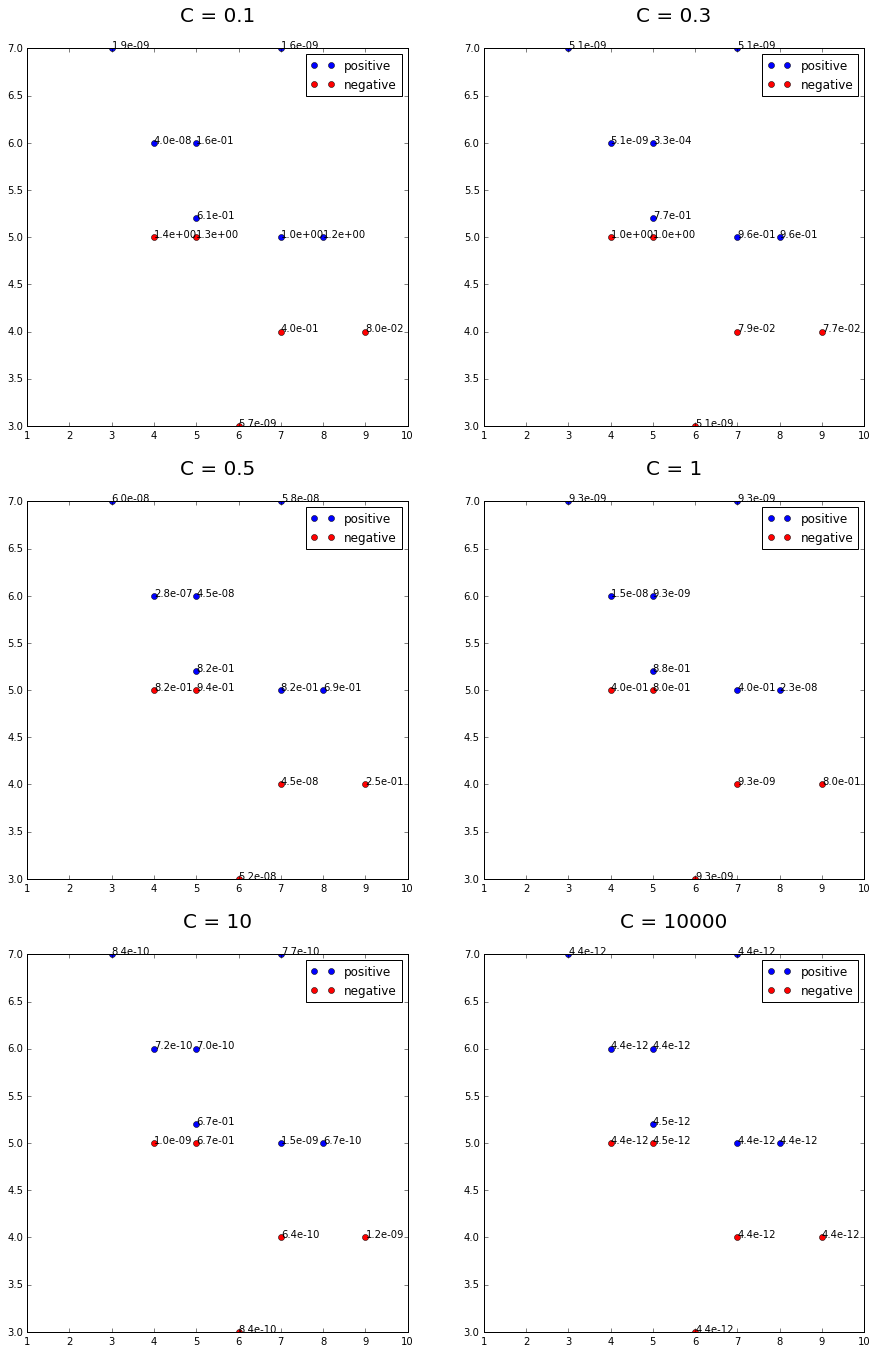

In [55]:
plt.figure(1, figsize = (15, 23))
C = [0.1, 0.3, 0.5, 1, 10, 10000]
for ite in range(len(C)):
    print('%s. C = %s\n'%(ite + 1, C[ite]))
    A = np.zeros((X.shape[0] + X.shape[0], X.shape[1] + X.shape[0] + 1))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            A[i, j] = X[i, j]*Y[i]
        A[i, X.shape[1]] = Y[i]
        A[i, X.shape[1] + i + 1] = -1
        
    for i in range(X.shape[0]):
        A[i + X.shape[0], X.shape[1] + i + 1] = -1

    b = np.zeros((X.shape[0] + X.shape[0], 1))
    b[0:X.shape[0]] = -1

    H = np.zeros((X.shape[1] + 1 + X.shape[0], X.shape[1] + 1 + X.shape[0]))
    for i in range(X.shape[1]):
        H[i, i] = 1

    f = np.zeros(X.shape[1] + 1 + X.shape[0])
    for i in range(X.shape[1] + 1, X.shape[1] + 1 + X.shape[0]):
        f[i] = C[ite]

    H = matrix(H)
    f = matrix(f)
    A = matrix(A)
    b = matrix(b)

    sol = solvers.qp(H, f, A, b)
    w = sol['x']
    
    plt.subplot(3, 2, ite + 1)
    plt.title('C = %s\n'%C[ite], fontsize = 20)
    plt.axis([1, 10, 3, 7])
    plt.plot(X[0:pos.shape[0], 0], X[0:pos.shape[0], 1], 'bo', label = 'positive')
    plt.plot(X[pos.shape[0]:pos.shape[0] + neg.shape[0], 0], X[pos.shape[0]:pos.shape[0] + neg.shape[0], 1], 'ro', label = 'negative')
    plt.legend()
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], '%.1e'%(w[i + 3]))
    print('')
plt.show()